In [1]:
import pandas as pd
import glob

def global_min_max_scaling(df, a=0, b=10000):
    global_min = df.min().min()  # Minimum value across the entire dataframe
    global_max = df.max().max()  # Maximum value across the entire dataframe
    
    if global_min == global_max:  # Check if all values are the same
        print(f"The entire dataset has constant values: {global_min}. No scaling applied.")
        return df
    
    # Apply global Min-Max scaling
    df = a + (df - global_min) * (b - a) / (global_max - global_min)
    print(f"Scaled data from {global_min}-{global_max} to {df.min().min()}-{df.max().max()}")
    return df

# Loop through all files starting with "Scan" and ending with ".csv"
for file_path in glob.glob("Scan*.csv"):
    print(f"Processing file: {file_path}")
    # Load CSV file without headers
    df = pd.read_csv(file_path, header=None)
    
    # Apply global Min-Max scaling
    scaled_df = global_min_max_scaling(df)
    
    # Save the scaled data to a new CSV file without headers
    new_file_name = file_path.replace("Scan", "Scaled")
    scaled_df.to_csv(new_file_name, index=False, header=False)
    print(f"Saved scaled data to: {new_file_name}")

Processing file: Scan 142 Anul ROI Perov.csv
Scaled data from 3011-6857 to 0.0-10000.0
Saved scaled data to: Scaled 142 Anul ROI Perov.csv
Processing file: Scan 183 Anul ROI Perov.csv
Scaled data from 3266-6444 to 0.0-10000.0
Saved scaled data to: Scaled 183 Anul ROI Perov.csv


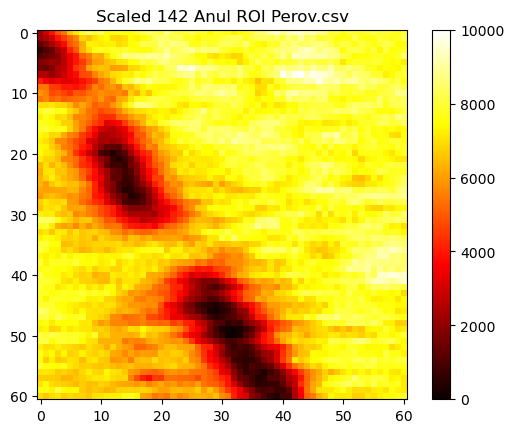

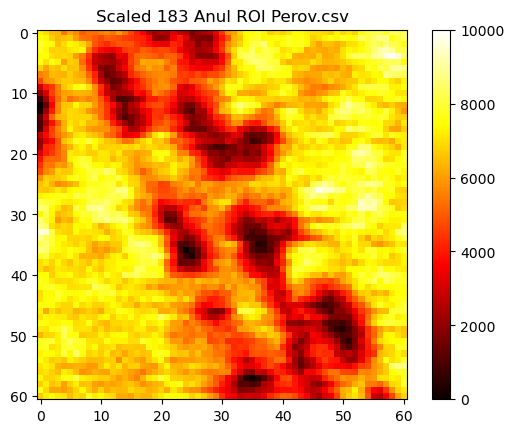

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

file_list = glob.glob('Scaled*.csv')

for file_name in file_list:
    matrix = np.genfromtxt(file_name, delimiter=',')

    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(file_name)
    plt.show()

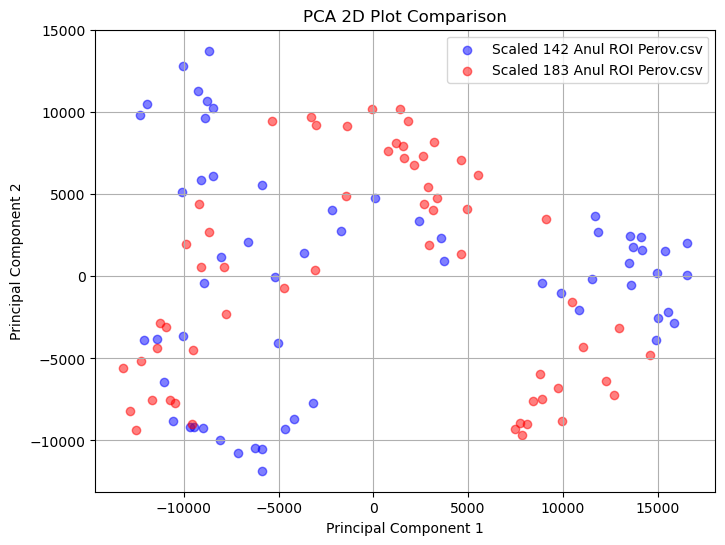

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Specify the file names you want to compare
file1 = 'Scaled 142 Anul ROI Perov.csv'
file2 = 'Scaled 183 Anul ROI Perov.csv'

# Load the 3D data from the first .csv file into a pandas DataFrame
data_1 = pd.read_csv(file1)

# Load the 3D data from the second .csv file into a pandas DataFrame
data_2 = pd.read_csv(file2)

# Perform PCA on the first 3D data
pca_1 = PCA(n_components=2)
data_pca_1 = pca_1.fit_transform(data_1)

# Perform PCA on the second 3D data
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_2)

# Create a scatter plot overlaying the two PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_1[:, 0], data_pca_1[:, 1], c='b', label=f'{file1}', alpha=0.5)
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c='r', label=f'{file2}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Plot Comparison')
plt.legend()
plt.grid(True)
plt.show()

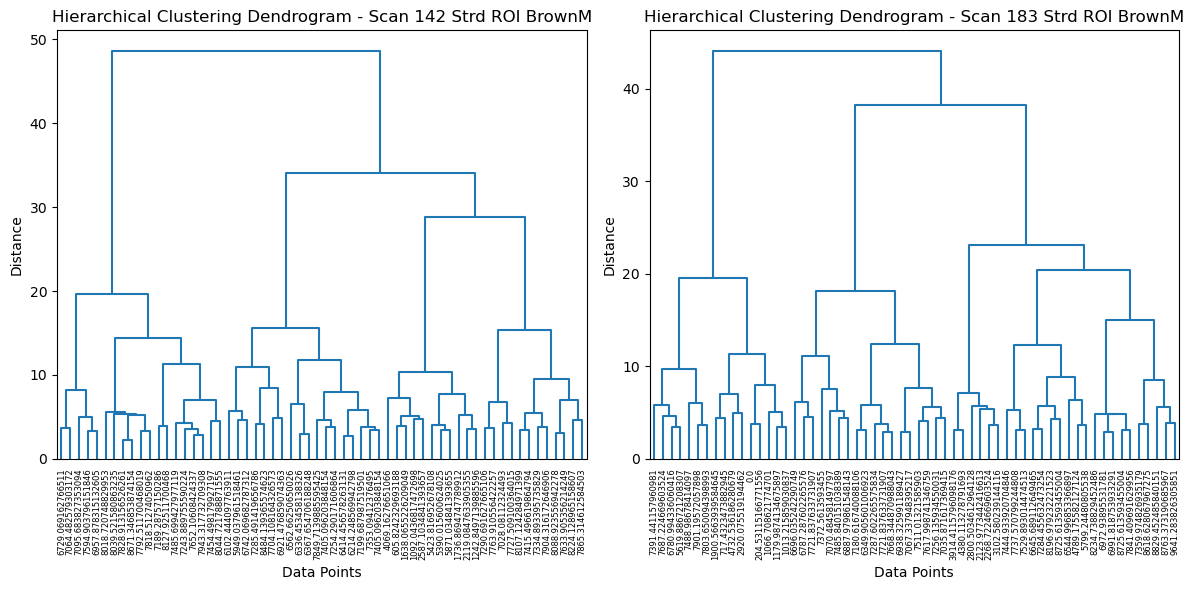

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Load the data from the first CSV file into a pandas DataFrame
data_1 = pd.read_csv('Scaled 142 Anul ROI Perov.csv', index_col=0)

# Load the data from the second CSV file into a pandas DataFrame
data_2 = pd.read_csv('Scaled 183 Anul ROI Perov.csv', index_col=0)

# Standardize the data for both files
scaler = StandardScaler()
data_standardized_1 = scaler.fit_transform(data_1)
data_standardized_2 = scaler.fit_transform(data_2)

# Perform hierarchical clustering for both files
linkage_matrix_1 = hierarchy.linkage(data_standardized_1, method='ward')
linkage_matrix_2 = hierarchy.linkage(data_standardized_2, method='ward')

# Create side-by-side dendrogram plots for comparison
plt.figure(figsize=(12, 6))

# Subplot 1: Dendrogram for the first file
plt.subplot(1, 2, 1)
dendrogram_1 = hierarchy.dendrogram(linkage_matrix_1, labels=data_1.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 142 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

# Subplot 2: Dendrogram for the second file
plt.subplot(1, 2, 2)
dendrogram_2 = hierarchy.dendrogram(linkage_matrix_2, labels=data_2.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 183 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

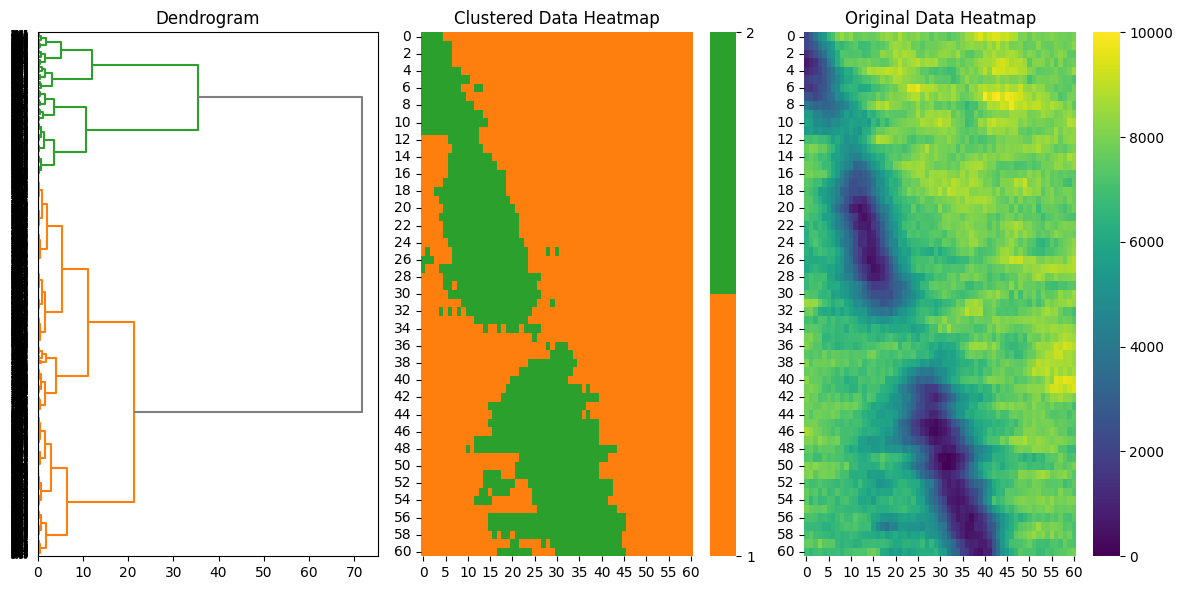

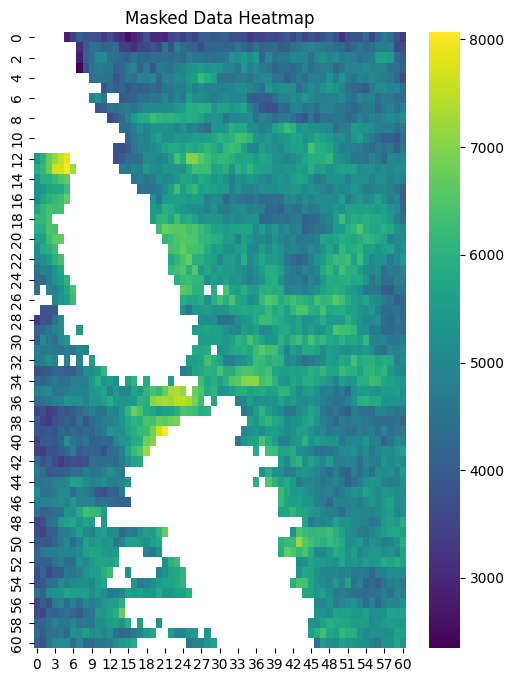

The mean value of the masked data is: 5138.808397622725


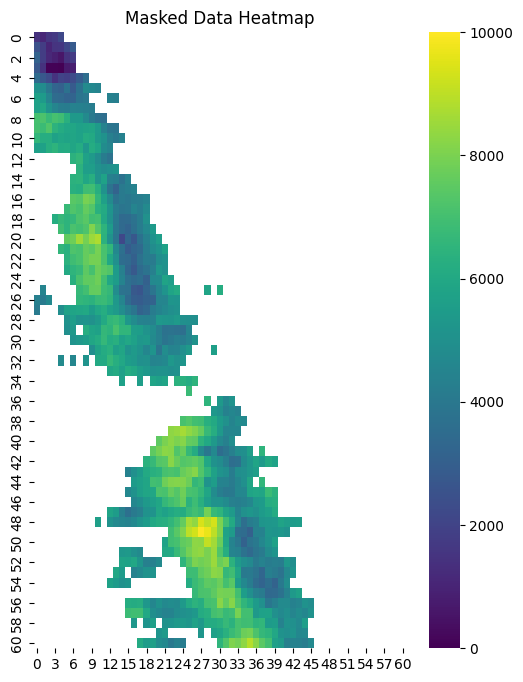

The mean value of the masked data is: 5506.424582778336


In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 2

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 1)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6,8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 2)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6,8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

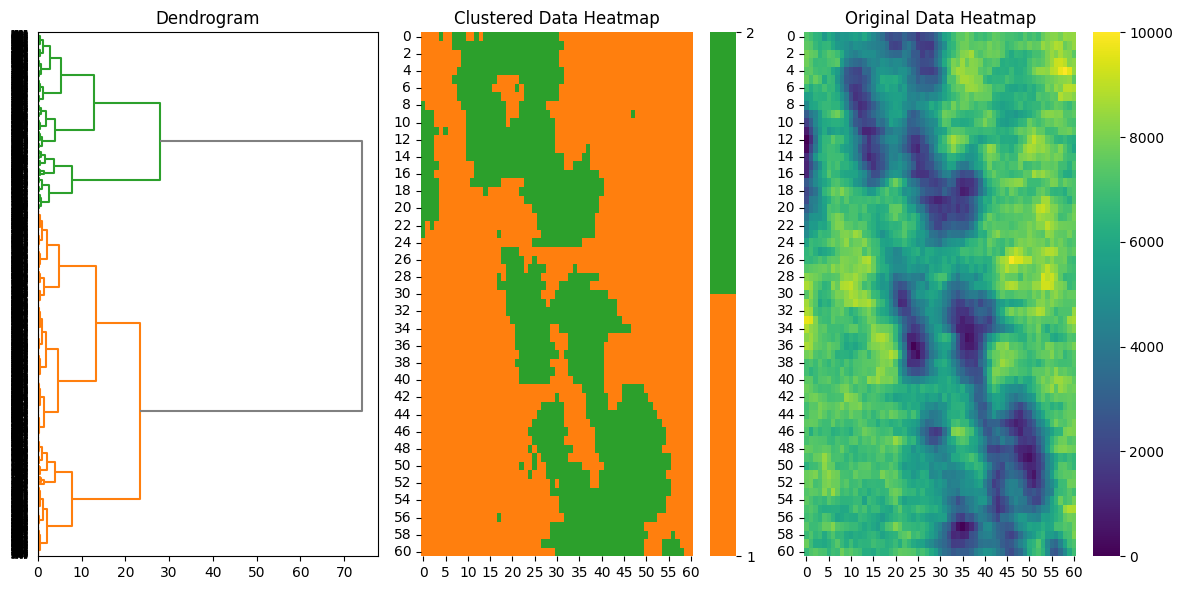

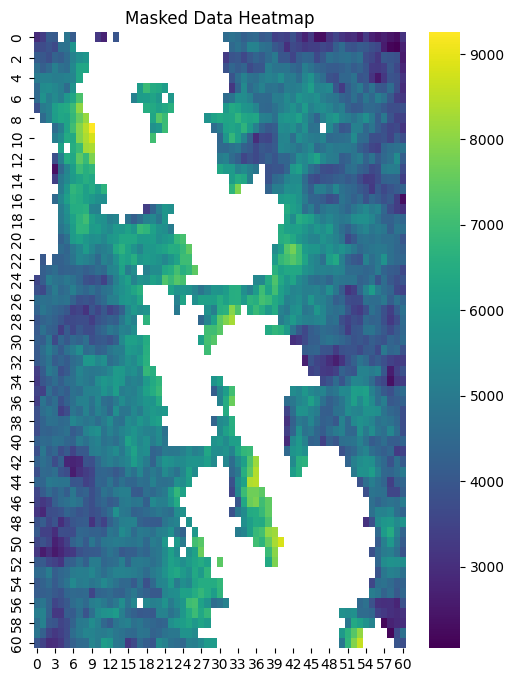

The mean value of the masked data is: 4929.3488270231255


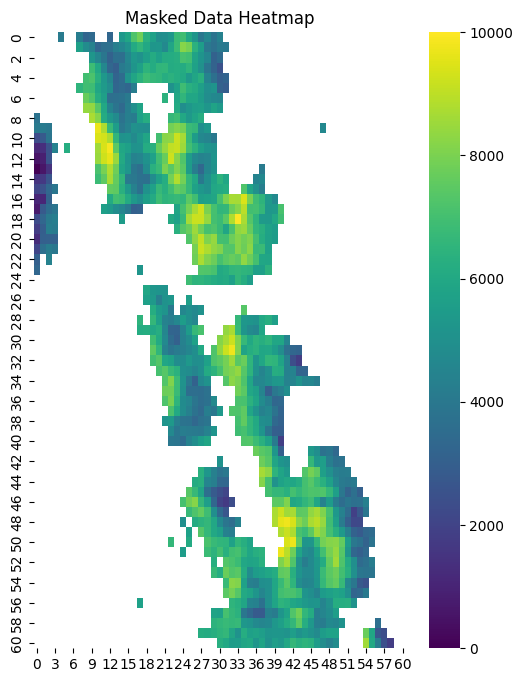

The mean value of the masked data is: 5725.251832952102


In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 2

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------------------

# 加载'Scaled 183 Anul ROI Perov.csv'和'Scaled 183 Anul ROI Strain Perov.csv'
data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 1)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 2)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

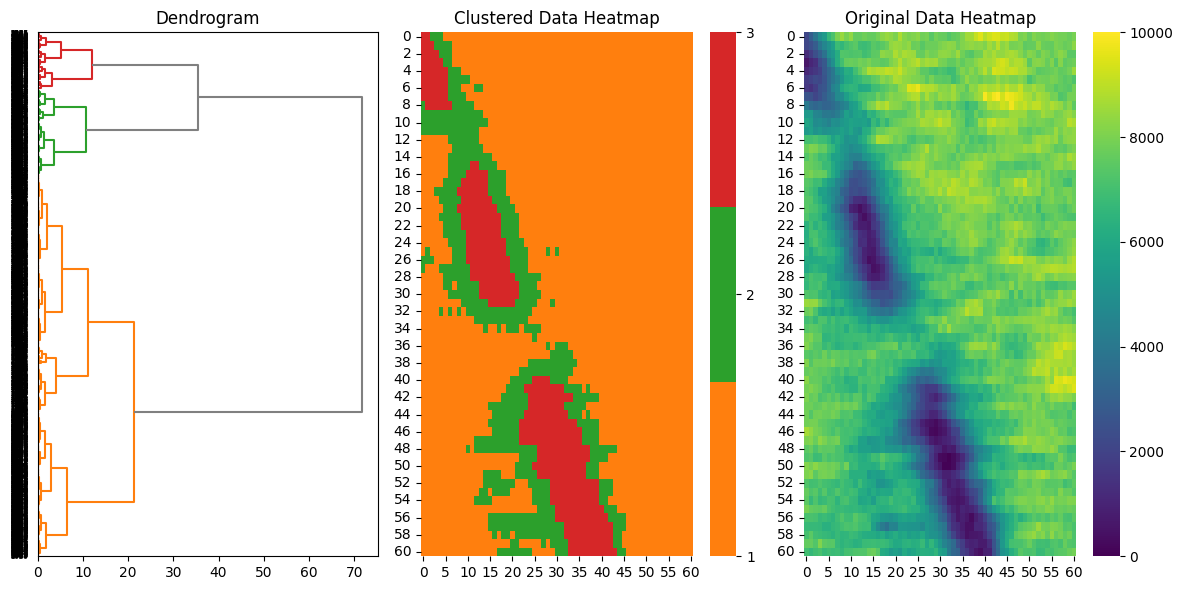

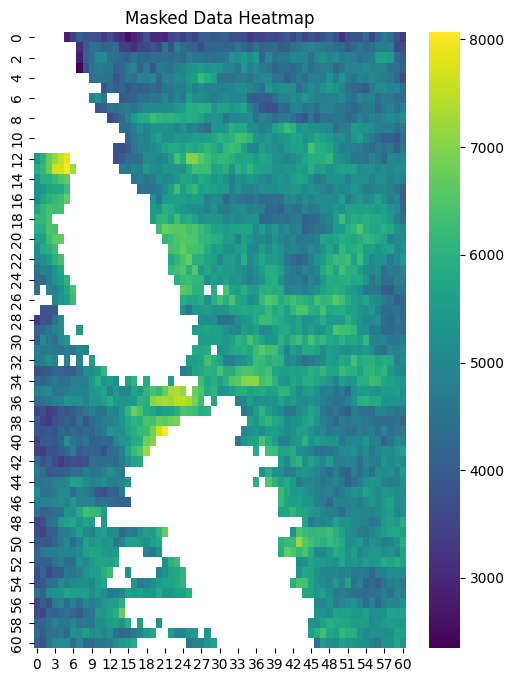

The mean value of the masked data is: 5138.808397622725


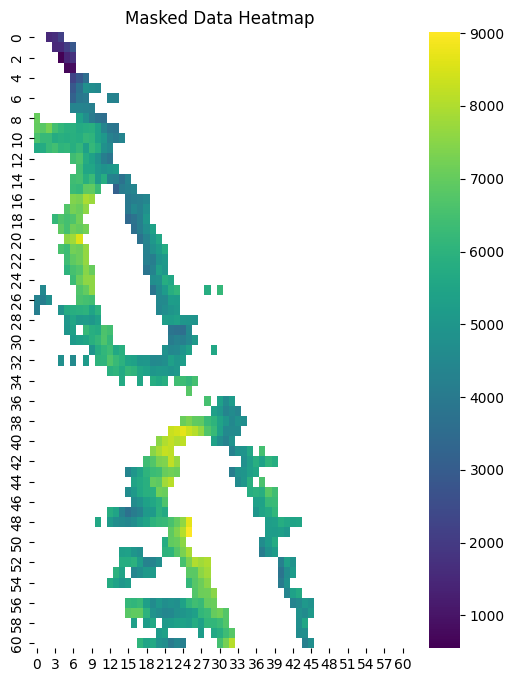

The mean value of the masked data is: 5561.258067648316


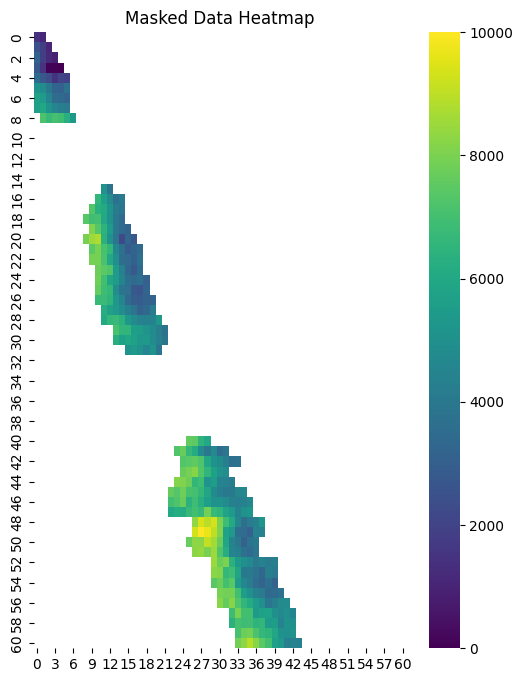

The mean value of the masked data is: 5425.460573019699


In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 3

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 1)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6,8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 2)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6,8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6,8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

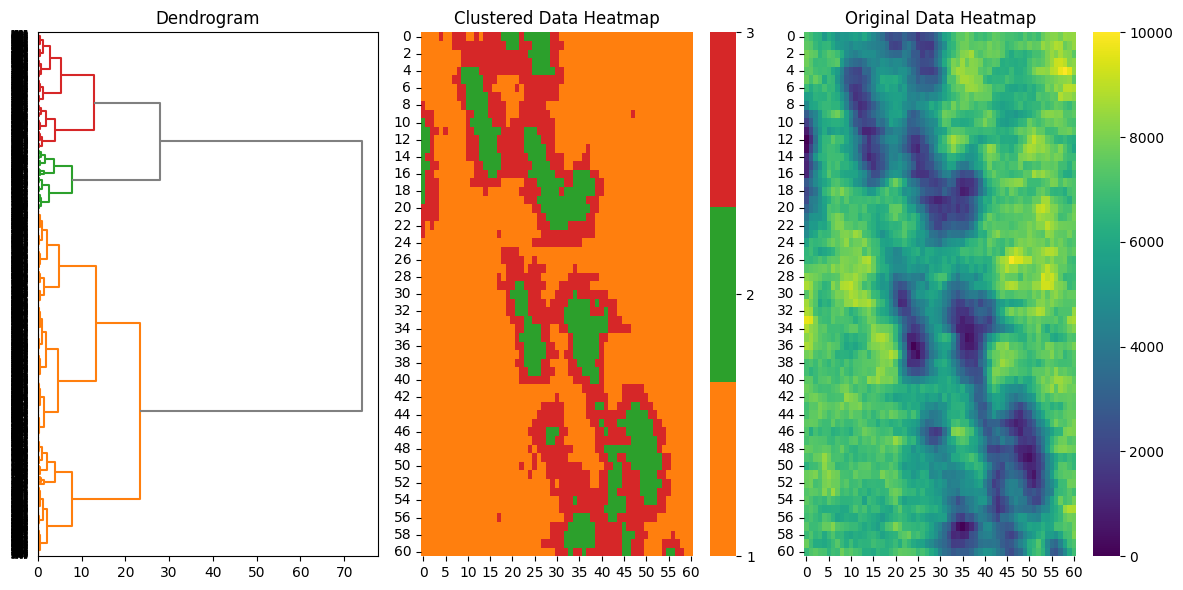

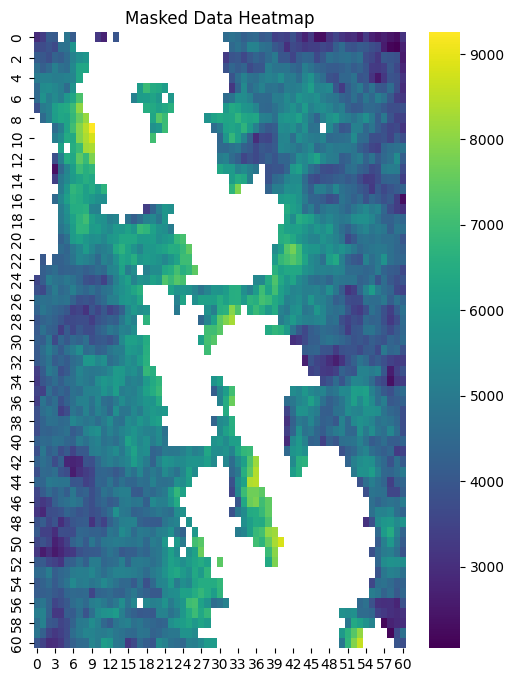

The mean value of the masked data is: 4929.3488270231255


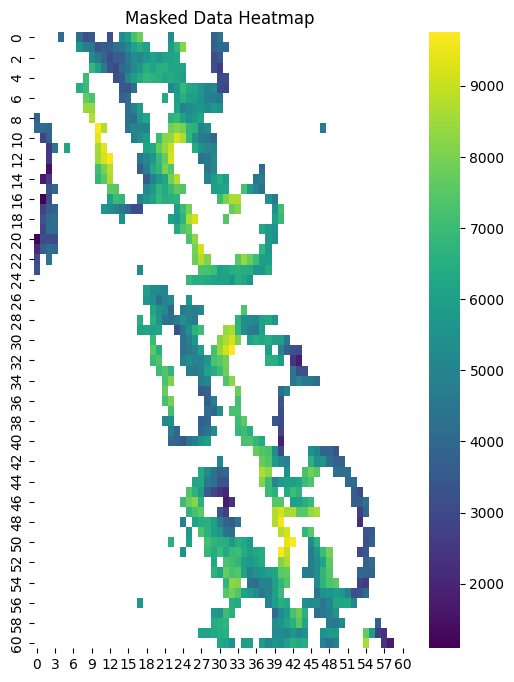

The mean value of the masked data is: 5724.729898382246


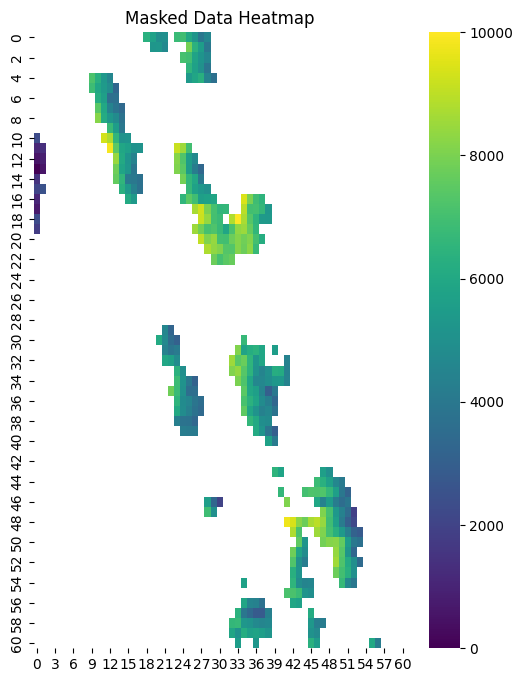

The mean value of the masked data is: 5726.2591178929915


In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 3

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------------------

# 加载'Scaled 183 Anul ROI Perov.csv'和'Scaled 183 Anul ROI Strain Perov.csv'
data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 1)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 2)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

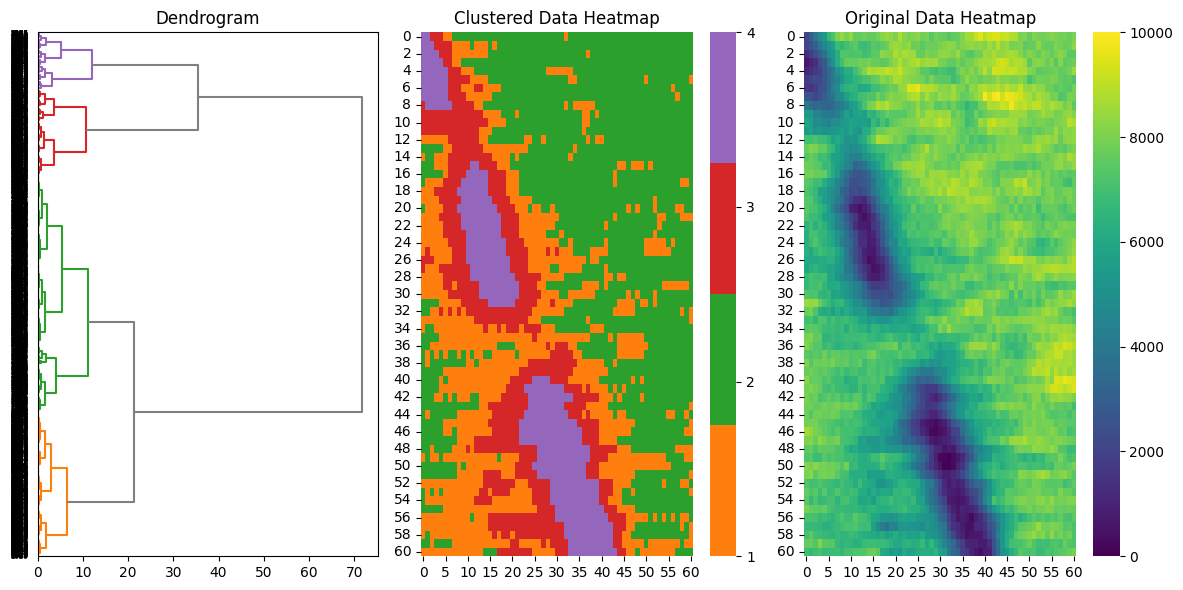

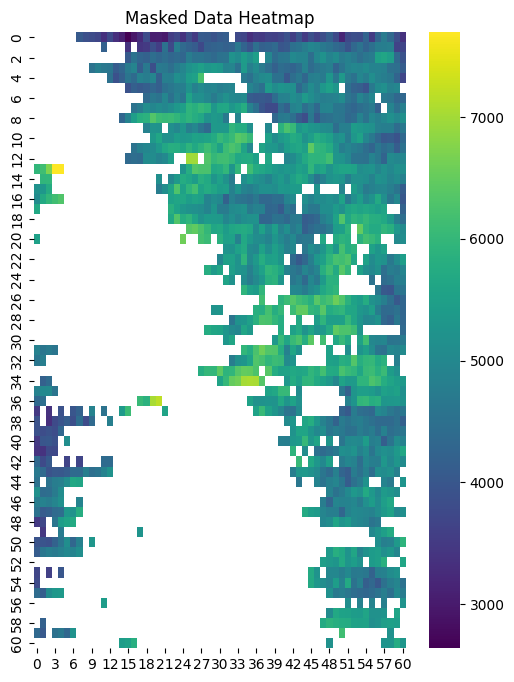

The mean value of the masked data is: 5056.056821002032


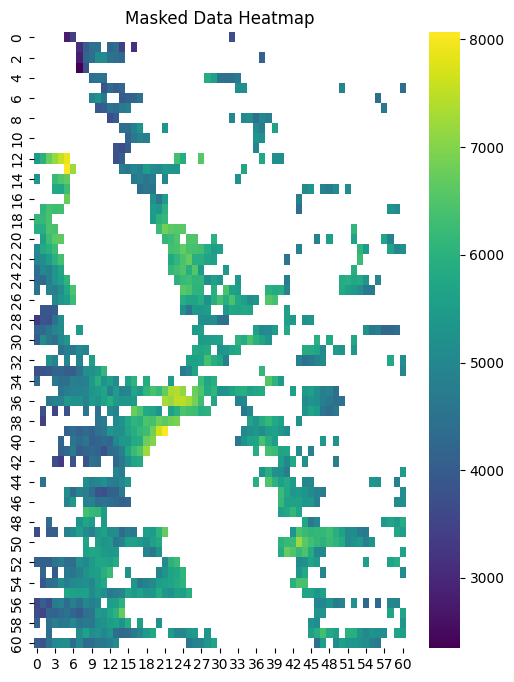

The mean value of the masked data is: 5276.349460820882


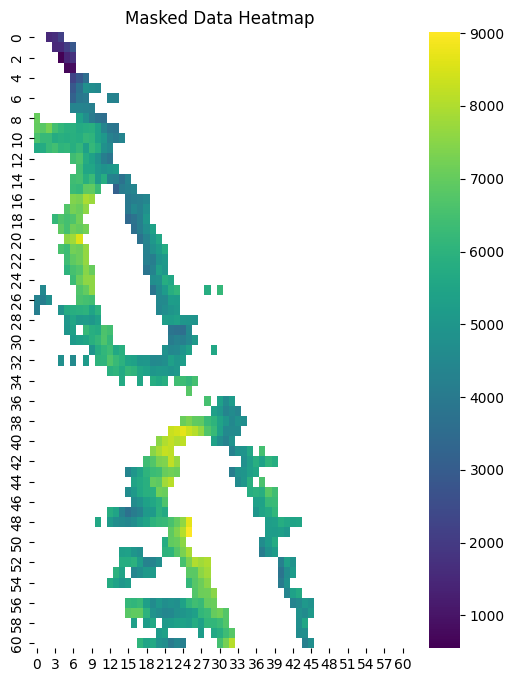

The mean value of the masked data is: 5561.258067648316


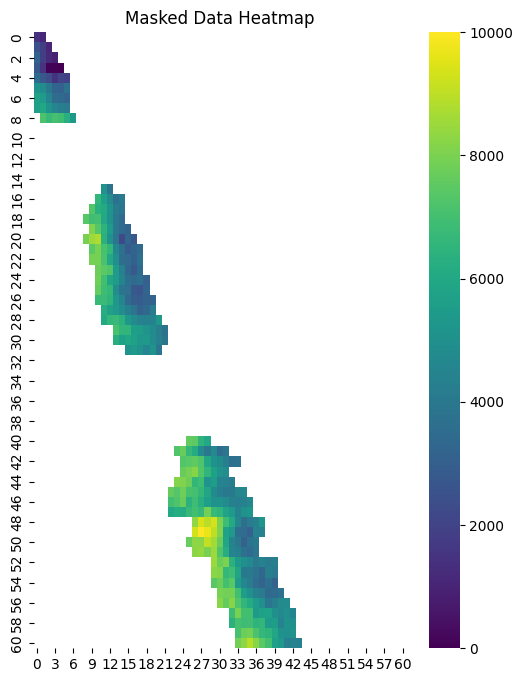

The mean value of the masked data is: 5425.460573019699


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 4

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------
data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 2)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 1)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 4)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")


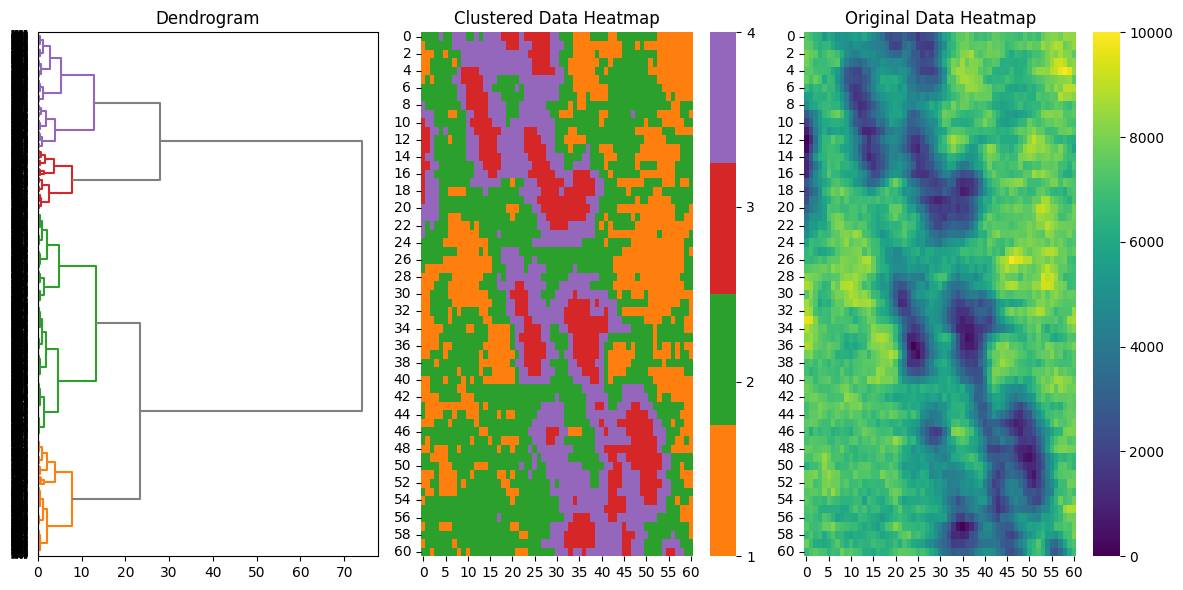

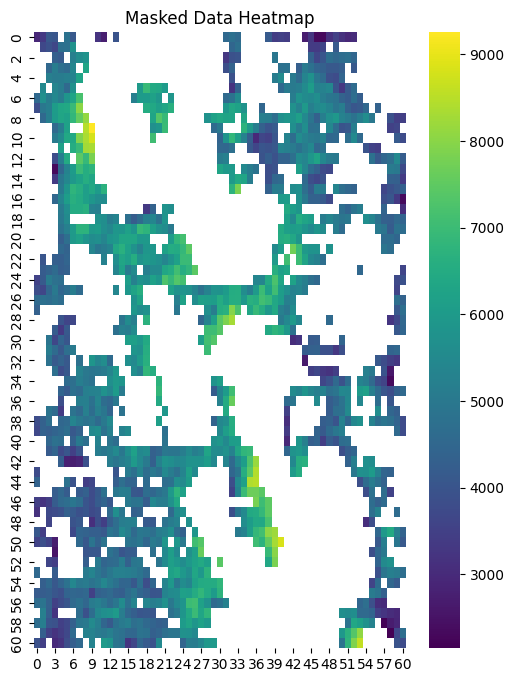

The mean value of the masked data is: 5131.06961281289


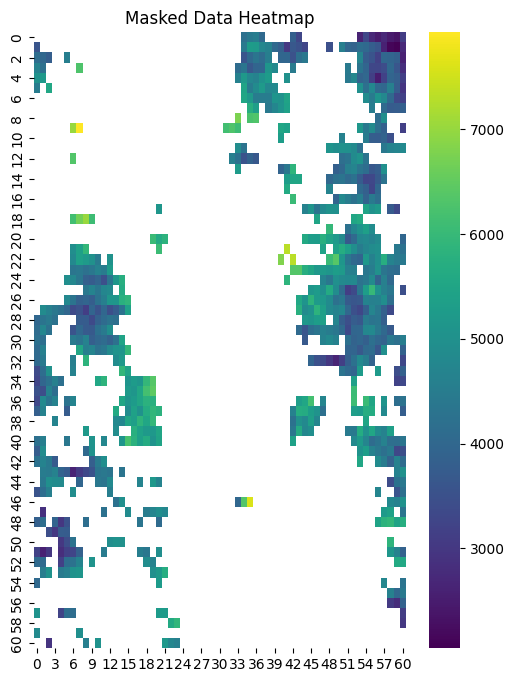

The mean value of the masked data is: 4545.604696879538


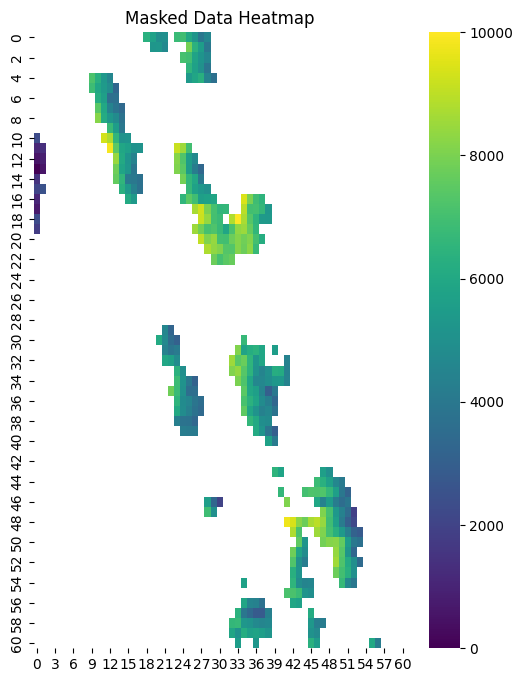

The mean value of the masked data is: 5726.2591178929915


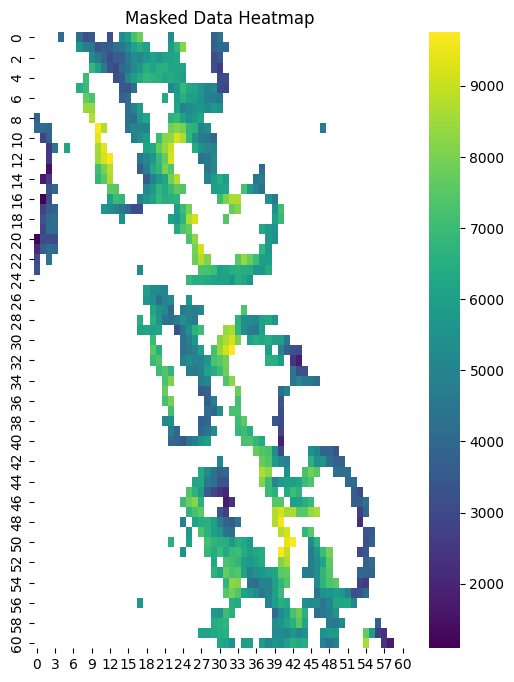

The mean value of the masked data is: 5724.729898382246


In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 4

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 2)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 1)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 183 Anul ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 183 Anul ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 4)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

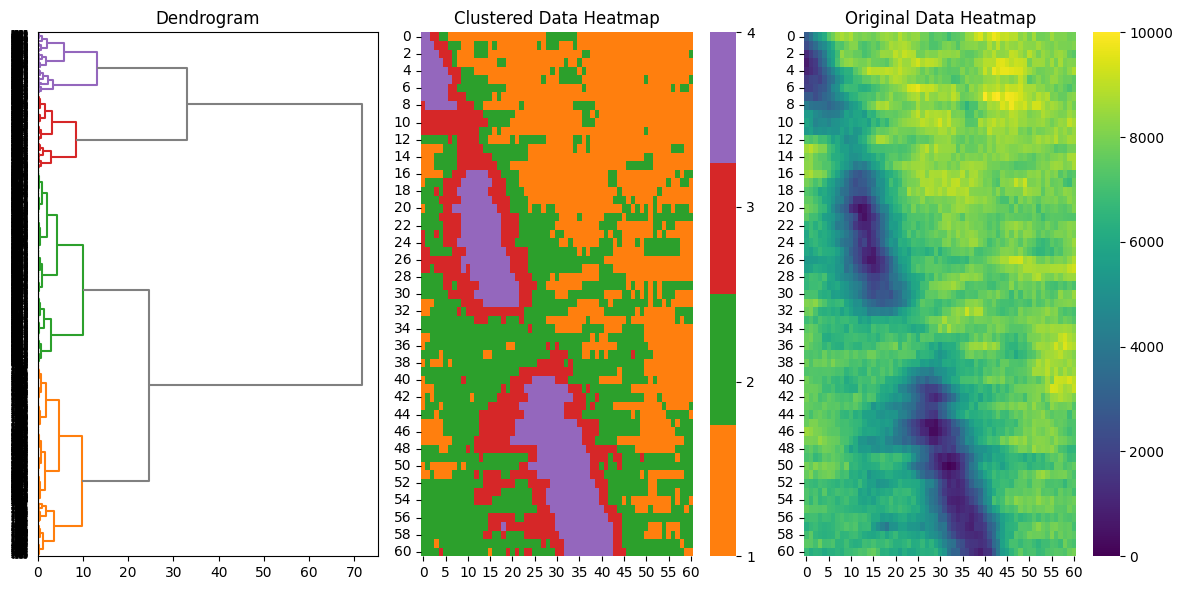

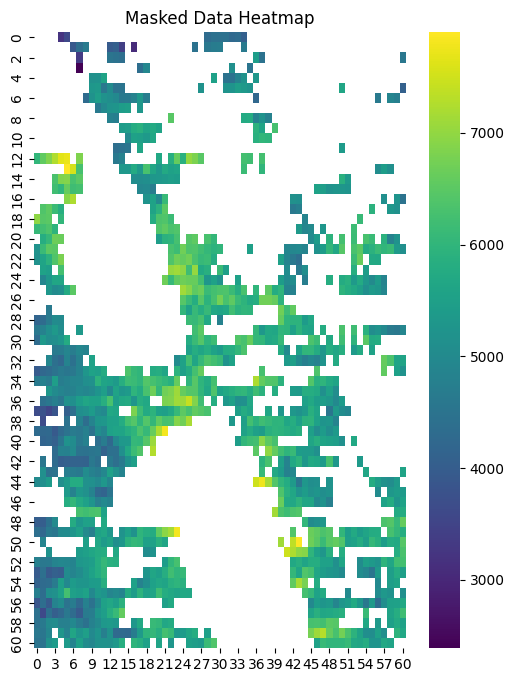

The mean value of the masked data is: 5539.293384858663


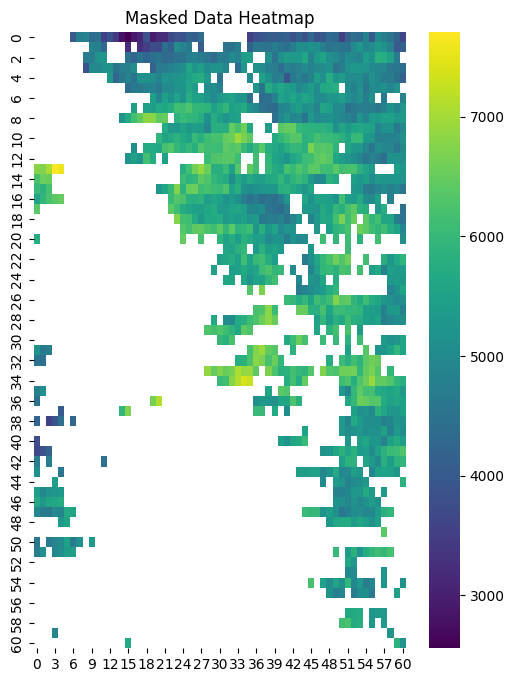

The mean value of the masked data is: 5429.813582025025


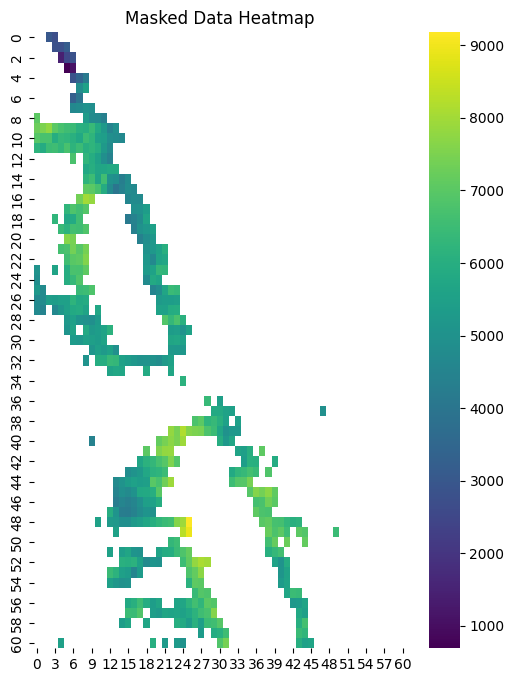

The mean value of the masked data is: 5860.976670424244


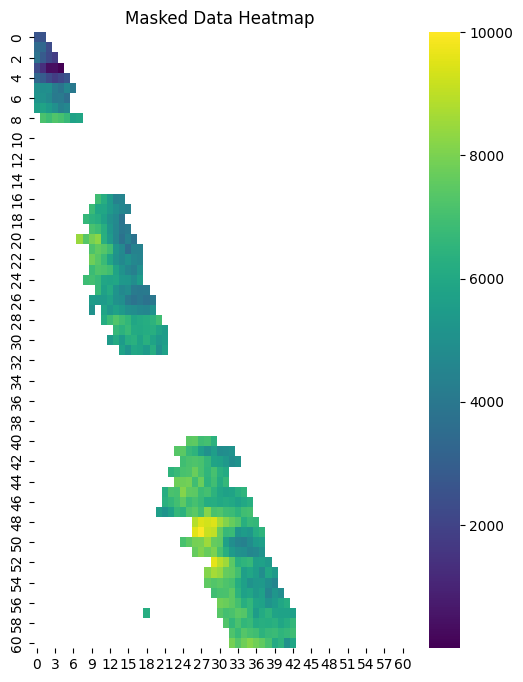

The mean value of the masked data is: 6027.281605940691


In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 4

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 2)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 1)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 4)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
original_data = data.copy()

flat_data = original_data.values.flatten()
scaler = StandardScaler()
scaled_flat_data = scaler.fit_transform(flat_data.reshape(-1, 1))

linked = linkage(scaled_flat_data, method='ward')
num_clusters = 3

cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
cluster_labels_2d = cluster_labels.reshape(original_data.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Dendrogram
plt.subplot(1, 3, 1)
dendro = dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
plt.title('Dendrogram')

# Extract leaf node order from dendrogram
leaf_order = dendro['leaves']

# Extract colors from dendrogram
colors = dendro['color_list']
unique_colors = list(set(colors))
color_map = {}
for leaf, color in zip(leaf_order, colors):
    label = cluster_labels[leaf]
    if label not in color_map:
        color_map[label] = color

# Clustered Data Heatmap
plt.subplot(1, 3, 2)
cmap = mcolors.ListedColormap([color_map[label] for label in sorted(color_map.keys())])
sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
plt.title('Clustered Data Heatmap')

# Original Data Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(original_data, cmap='viridis')
plt.title('Original Data Heatmap')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

# 基于先前的聚类标签创建蒙版，这里假设cluster_labels_2d已经存在
# 选择你想要应用蒙版的聚类，例如，如果你选择标签为1的聚类
mask = (cluster_labels_2d == 2)

# 将蒙版应用于'Scaled 183 Anul ROI Strain Perov.csv'的数据
masked_data = np.where(mask, data_strain, np.nan)

# 可视化应用了蒙版的数据
plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

# 计算蒙版中数据的平均值，忽略NaN值
mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 1)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

data_perov = pd.read_csv('Scaled 142 Strd ROI Perov.csv', header=None)
data_strain = pd.read_csv('Scaled 142 Strd ROI Strain Perov.csv', header=None)

mask = (cluster_labels_2d == 3)
masked_data = np.where(mask, data_strain, np.nan)

plt.figure(figsize=(6, 8))
sns.heatmap(masked_data, cmap='viridis')
plt.title('Masked Data Heatmap')
plt.show()

mean_value = np.nanmean(masked_data)

print(f"The mean value of the masked data is: {mean_value}")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scaled 142 Anul ROI Perov.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Anul ROI Perov.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'red', -1: 'blue'}

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    colors = [color_map[label] for label in labels]

    # Using plotly for interactive plotting
    fig = go.Figure(data=[go.Scatter3d(x=X_flat, y=Y_flat, z=Z_flat, mode='markers', marker=dict(size=3, color=colors))])
    
    fig.update_layout(title=f'SVM Clustering - {file_name}', margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

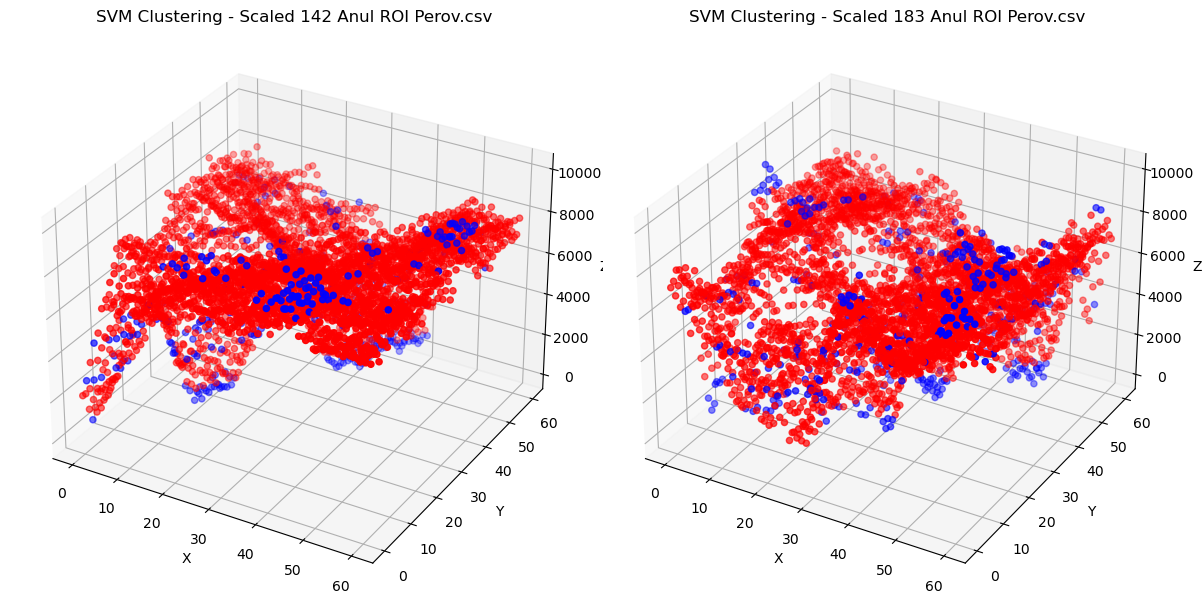

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scaled 142 Anul ROI Perov.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Anul ROI Perov.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'r', -1: 'b'}

fig = plt.figure(figsize=(12, 6))  # Adjust figure size as per your requirements

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    ax = fig.add_subplot(1, 2, index + 1, projection='3d')  # This will create two side-by-side 3D plots
    ax.scatter(X_flat, Y_flat, Z_flat, c=[color_map[label] for label in labels])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'SVM Clustering - {file_name}')

plt.tight_layout()
plt.show()

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.



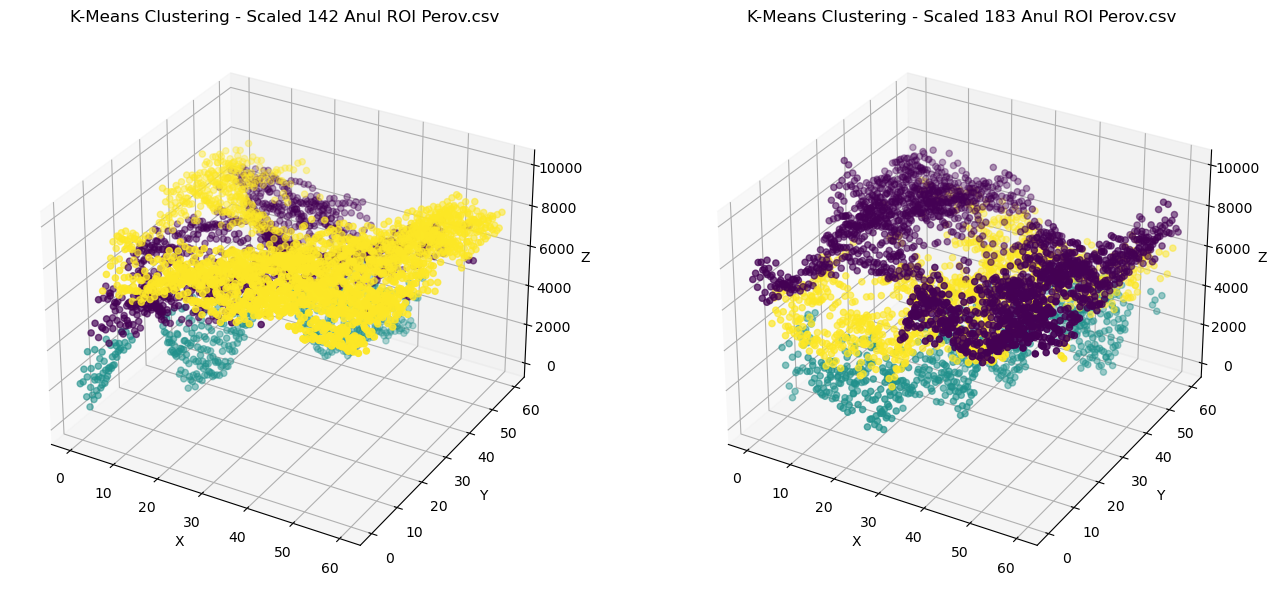

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file1_name = 'Scaled 142 Anul ROI Perov.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Anul ROI Perov.csv'  # Replace with your specific file name

file_list = [file1_name, file2_name]

# Create a single figure and specify its size
fig = plt.figure(figsize=(14, 6))

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')
    X = matrix.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    # Adjust the position of the subplot for each file
    ax = fig.add_subplot(1, 2, index+1, projection='3d')
    ax.scatter(X_flat, Y_flat, Z_flat, c=labels, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'K-Means Clustering - {file_name}')

plt.tight_layout()
plt.show()